In [66]:
import torch
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
torch.random.seed = 42

import random

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
n_epochs = 5
log_interval = 10

In [44]:
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True,
                                transform=torchvision.transforms.Compose([
                                    torchvision.transforms.Resize(32),
                                    torchvision.transforms.ToTensor(), 
                                    torchvision.transforms.Normalize((0.1307,), (0.3081,))
                                ])
                                )

mnist_testset = datasets.MNIST(root='../data', train=False, download=True,
                                transform=torchvision.transforms.Compose([
                                    torchvision.transforms.Resize(32),
                                    torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize((0.1307,), (0.3081,))
                                                                    ])
                              )

In [45]:
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size_train, True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size_test, True)

In [46]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

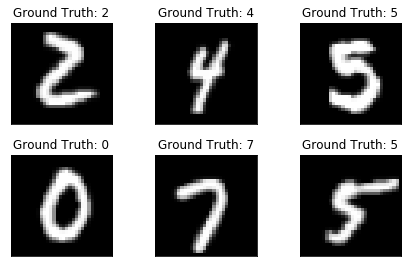

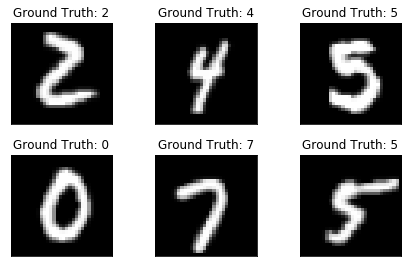

In [47]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [69]:
class Net(nn.Module):
    def __init__(self, H):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(D)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2)) # 6 @ 12x12
        x = F.relu(F.max_pool2d(self.conv2(x), 2)) # 16 @ 3x3
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) # 120
        x = self.dropout(x)
        x = F.relu(self.fc2(x)) # 84
        x = self.dropout(x)
        x = self.fc3(x)         # 10
        return F.log_softmax(x)

In [49]:
network = Net(0)
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

In [50]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [51]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

In [52]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [53]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/lib/python3.7/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3026, Accuracy: 1031/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311153
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.796376
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.610087
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.484463
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.320947
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.643251
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.092998
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.440908
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.124307
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.337721
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.164097
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.296877
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.129738
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.289169
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.296715
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.189692
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.159383
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.098289
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.200989
Train Epoch: 1 [12160

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.023114
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.149896
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.046292
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.057661
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.047196
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.143594
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.096510
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.060789
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.041751
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.070239
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.170520
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.039061
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.035530
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.073914
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.171318
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.193386
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.127249
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.002915
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.061747
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.172748


Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.084650
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.190954
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.260780
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.063580
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.000943
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.101816
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.160395
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.027530
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.019910
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.263134
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.001950
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.004951
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.209530
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.004599
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.046232
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.036678
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.060746
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.001693
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.071556
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.174472


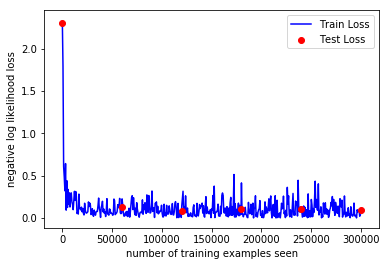

In [54]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue', zorder=1)
plt.scatter(test_counter, test_losses, color='red', zorder=2)
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

In [55]:
with torch.no_grad():
  output = network(example_data)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


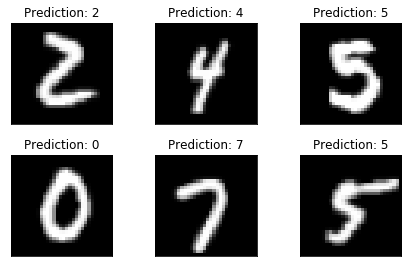

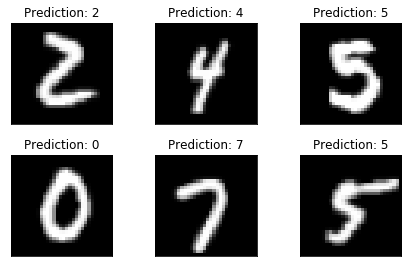

In [56]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


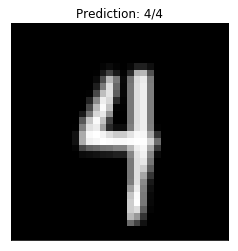

In [61]:
img = enumerate(test_loader)
im_idx, (im_data, im_targets) = next(img)

with torch.no_grad():
  output = network(im_data)
    
plt.imshow(im_data[0][0], cmap='gray', interpolation='none')
plt.title("Prediction: {}/{}".format(
output.data.max(1, keepdim=True)[1][0].item(),
im_targets[0]))
plt.xticks([])
plt.yticks([])

plt.show()

In [70]:
def kfold(k, N, epochs, model):
    optimizer = optim.Adam(model.parameters())
    loss_avg = 0
    acc_avg = 0
    for i in range(k):
        epoch = 0
        count = 0
        min_error = 0
        while (epoch < epochs and count < epochs/10):
            train(model, X_train[i*(int(N/k)):(i+1)*(int(N/k))], y_train[i*(int(N/k)):(i+1)*(int(N/k))], optimizer, criterion, epoch, '')
            test_loss, test_acc = test(model, X_test, y_test, criterion, 'ret')
            epoch += 1
            if test_loss >= min_error:
                count += 1
            else:
                min_error = test_loss
            print('.', end='')
        loss_avg += test_loss.detach()
        acc_avg += test_acc
        print('|', end='')
    print('>')
    return loss_avg/k, test_acc/k

In [71]:
models = []
for _ in range(5):
    D = random.randint(0,1)
    model = Net(D)
    loss, acc = kfold(5, 60000, 100, model)
    models.append((H, loss, acc))      

NameError: name 'X_train' is not defined

### Referencias

https://nextjournal.com/gkoehler/pytorch-mnist